<h1>Final Project Zachary Campbell - COVID Vaccine Analysis</h1>

<p>Initally I had intended to perform a financial analysis to determine if there was a way to extrapolate some insight into stock fluctuations based on the stock price, 10-K information and macroeconomic data. However, based on the available data this was not feasible as such I chose to pivot to another impactful analysis: COVID Vaccine Progress Analysis</p>

<h3>Project Milestone 1</h3>

<p>
    
The purpose of this project is to analyze and evaluate the vaccination progress that was made on a global level. This is done through a Kaggle Dataset that holds the vaccination information by country, an API that will help provide both event information related to the vaccine and approval information as well as a website that will provide daily vaccination information
    
Data Sources:

Flat File: COVID-19 World Vaccination Progress dataset from Kaggle. This dataset has information on the daily vaccination doses administered and the total number of people vaccinated by country, manufacturer, and other demographics.

Link: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

API: OpenFDA API from the U.S. Food and Drug Administration (FDA). This API provides information on the vaccines approved for emergency use in the United States, as well as adverse event reports related to those vaccines.

Link: https://open.fda.gov/apis/drug/event/explore-the-api-with-an-example-query/

Website: Our World in Data COVID-19 vaccination data. This website provides daily updated vaccination data for countries worldwide, as well as other COVID-19 related data.

Link: https://ourworldindata.org/covid-vaccinations
    

Relationship of the data:
    The COVID-19 world vaccination progress dataset contains the info on the daily vaccination doses that is administered adn the total number of people vaccinated by country and manufacturer. The OpenFDA api allows me to pull news and events that are related to the US based vaccines. While there are other countries that have the same vaccines, given that they are developed in the US using it as a basis for news related to vaccines is okay. Finally, the our world in data website that provides the daily updated vaccination data allows realtime updates to the data.
    

Project Details:
    The aim of this project is to examine the impact and progress of COVID-19 vaccinations around the world. With vaccination being a crucial strategy in controlling the spread of the virus, analyzing the vaccination data can provide valuable insights into the efficacy of different vaccines, vaccination rates, and demographics of vaccinated populations. These insights can inform public health policies and strategies to combat the spread of the virus. One ethical consideration is the privacy of individuals who report adverse events to the FDA, as well as potential biases in the data due to disparities in access to vaccines. Merging data from different sources and dealing with inconsistent or missing data will be a key challenge, which will be addressed using Python programming language and libraries such as Pandas, NumPy, and Matplotlib, as well as SQL for data merging and storage. The goal is to contribute to the global efforts to contain the spread of COVID-19 and gain a better understanding of its impact on populations worldwide, while ensuring that individual privacy and potential biases are taken into account.</p>

<h3>Project Milestone 2</h3>

In [3]:
import pandas as pd
import numpy as np

#Importing the data
df = pd.read_csv('country_vaccinations.csv')

print(df.head())
print(df.info())

       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                 

<h4>The below is cleaning the dataset that was imported from the Kaggle link to make it more usable for the later portions of this assignment. That includes filling missing values, removing duplicate rows and renaming the columns to make them more readable</h4>

In [4]:
# Fill in missing values in the total_vaccinations column with 0
df['total_vaccinations'] = df['total_vaccinations'].fillna(0)

# Fill in missing values in the people_vaccinated column with 0
df['people_vaccinated'] = df['people_vaccinated'].fillna(0)

# Fill in missing values in the people_fully_vaccinated column with 0
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].fillna(0)

# Fill in missing values in the daily_vaccinations_raw column with 0
df['daily_vaccinations_raw'] = df['daily_vaccinations_raw'].fillna(0)

# Fill in missing values in the daily_vaccinations column with the median value
df['daily_vaccinations'] = df['daily_vaccinations'].fillna(df['daily_vaccinations'].median())

# Fill in missing values in the total_vaccinations_per_hundred column with the median value
df['total_vaccinations_per_hundred'] = df['total_vaccinations_per_hundred'].fillna(df['total_vaccinations_per_hundred'].median())

# Fill in missing values in the people_vaccinated_per_hundred column with the median value
df['people_vaccinated_per_hundred'] = df['people_vaccinated_per_hundred'].fillna(df['people_vaccinated_per_hundred'].median())

# Fill in missing values in the people_fully_vaccinated_per_hundred column with the median value
df['people_fully_vaccinated_per_hundred'] = df['people_fully_vaccinated_per_hundred'].fillna(df['people_fully_vaccinated_per_hundred'].median())

# Fill in missing values in the daily_vaccinations_per_million column with the median value
df['daily_vaccinations_per_million'] = df['daily_vaccinations_per_million'].fillna(df['daily_vaccinations_per_million'].median())


In [5]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()


In [6]:
# Rename columns to make them more readable and consistent

df.rename(columns={
    'country': 'Country',
    'iso_code': 'ISO_Code',
    'date': 'Date',
    'total_vaccinations': 'Total_Vaccinations',
    'people_vaccinated': 'People_Vaccinated',
    'people_fully_vaccinated': 'People_Fully_Vaccinated',
    'daily_vaccinations_raw': 'Daily_Vaccinations_Raw',
    'daily_vaccinations': 'Daily_Vaccinations',
    'total_vaccinations_per_hundred': 'Total_Vaccinations_Per_Hundred',
    'people_vaccinated_per_hundred': 'People_Vaccinated_Per_Hundred',
    'people_fully_vaccinated_per_hundred': 'People_Fully_Vaccinated_Per_Hundred',
    'daily_vaccinations_per_million': 'Daily_Vaccinations_Per_Million'
}, inplace=True)



In [7]:
# Printing the cleaned data
print(df.head(10))

       Country ISO_Code        Date  Total_Vaccinations  People_Vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 0.0                0.0   
2  Afghanistan      AFG  2021-02-24                 0.0                0.0   
3  Afghanistan      AFG  2021-02-25                 0.0                0.0   
4  Afghanistan      AFG  2021-02-26                 0.0                0.0   
5  Afghanistan      AFG  2021-02-27                 0.0                0.0   
6  Afghanistan      AFG  2021-02-28              8200.0             8200.0   
7  Afghanistan      AFG  2021-03-01                 0.0                0.0   
8  Afghanistan      AFG  2021-03-02                 0.0                0.0   
9  Afghanistan      AFG  2021-03-03                 0.0                0.0   

   People_Fully_Vaccinated  Daily_Vaccinations_Raw  Daily_Vaccinations  \
0                      0.0                     0.0              734

<h3>Milestone 3</h3>

In [8]:
import pandas as pd
import numpy as np

# Load the data into a dataframe
websiteDf = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")


<p>The purpose of the below step is to remove any rows that have missing values from the dataset</p>

In [9]:
# Step 1: Drop rows with missing values
websiteDf = websiteDf.dropna()



<p>The below renames all the columns and makes the names more readable including adding spaces in place of the "_"</p>

In [10]:
# Step 2: Rename columns for readability
websiteDf = websiteDf.rename(columns={
    'location': 'Location',
    'iso_code': 'ISO Code',
    'date': 'Date',
    'total_vaccinations': 'Total Vaccinations',
    'people_vaccinated': 'People Vaccinated',
    'people_fully_vaccinated': 'People Fully Vaccinated',
    'daily_vaccinations_raw': 'Daily Vaccinations (Raw)',
    'daily_vaccinations': 'Daily Vaccinations',
    'total_vaccinations_per_hundred': 'Total Vaccinations Per Hundred',
    'people_vaccinated_per_hundred': 'People Vaccinated Per Hundred',
    'people_fully_vaccinated_per_hundred': 'People Fully Vaccinated Per Hundred',
    'daily_vaccinations_per_million': 'Daily Vaccinations Per Million'
})


<p>The below converts all the dates to the same format and sets them as a date format which will be important for the analysis in the later parts of the project</p>

In [11]:
# Step 3: Convert date column to datetime format
websiteDf['Date'] = pd.to_datetime(websiteDf['Date'], format='%Y-%m-%d')

<p>This step removes all the outliers from the total vaccinations that uses quartiles</p>

In [12]:
# Step 4: Remove outliers in Total Vaccinations column
Q1 = websiteDf['Total Vaccinations'].quantile(0.25)
Q3 = websiteDf['Total Vaccinations'].quantile(0.75)
IQR = Q3 - Q1
websiteDf = websiteDf[~((websiteDf['Total Vaccinations'] < (Q1 - 1.5 * IQR)) | (websiteDf['Total Vaccinations'] > (Q3 + 1.5 * IQR)))]

<p>This step removes the duplicate rows that exist</p>

In [13]:
# Step 5: Remove duplicate rows
websiteDf = websiteDf.drop_duplicates()

In [14]:
# Print the cleaned dataframe
print(websiteDf)

           Location  ISO Code       Date  Total Vaccinations  \
792     Afghanistan       AFG 2023-04-25          16847327.0   
1119         Africa  OWID_AFR 2021-10-28         189809912.0   
1120         Africa  OWID_AFR 2021-10-29         193296330.0   
1121         Africa  OWID_AFR 2021-10-30         194361624.0   
1122         Africa  OWID_AFR 2021-10-31         196480876.0   
...             ...       ...        ...                 ...   
170866     Zimbabwe       ZWE 2022-09-25          12187779.0   
170867     Zimbabwe       ZWE 2022-09-26          12190411.0   
170868     Zimbabwe       ZWE 2022-09-27          12201937.0   
170873     Zimbabwe       ZWE 2022-10-02          12214870.0   
170874     Zimbabwe       ZWE 2022-10-03          12216848.0   

        People Vaccinated  People Fully Vaccinated  total_boosters  \
792            14735342.0               14021488.0       1077577.0   
1119          118429867.0               76360930.0         28870.0   
1120          1200945

<h3>Milestone 4</h3>

In [15]:
import requests
import pandas as pd

# Make a request to the API endpoint
url = "https://data.cdc.gov/resource/unsk-b7fc.json"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the data from the response
    data = response.json()

    # Create a DataFrame from the data
    apiDf = pd.DataFrame(data)

    # Print the DataFrame
    print(apiDf)

else:
    print("Failed to fetch data from the API.")


                        date mmwr_week location distributed  \
0    2023-05-10T00:00:00.000        19       NE     5481710   
1    2023-05-10T00:00:00.000        19       LA    10282120   
2    2023-05-10T00:00:00.000        19       GA    28727475   
3    2023-05-10T00:00:00.000        19       WY     1281755   
4    2023-05-10T00:00:00.000        19       CO    17769135   
..                       ...       ...      ...         ...   
995  2023-01-25T00:00:00.000         4       NH     4946690   
996  2023-01-25T00:00:00.000         4       NY    59601225   
997  2023-01-25T00:00:00.000         4       OR    13675105   
998  2023-01-25T00:00:00.000         4      DD2     7671550   
999  2023-01-25T00:00:00.000         4       ND     1847480   

    distributed_janssen distributed_moderna distributed_pfizer  \
0                152400             1647380            2905630   
1                330500             3807980            5164550   
2                869100             9763000  

In [16]:
# Rename individual columns
apiDf.rename(columns={'date': 'Date'}, inplace=True)
apiDf.rename(columns={'mmwr_week': 'Week'}, inplace=True)
apiDf.rename(columns={'location': 'Location'}, inplace=True)
apiDf.rename(columns={'distributed': 'Total Vaccines Given'}, inplace=True)
apiDf.rename(columns={'distributed_janssen': 'Total J&J Vaccines'}, inplace=True)
apiDf.rename(columns={'distributed_moderna': 'Total Moderna Vaccines'}, inplace=True)
apiDf.rename(columns={'distributed_pfizer': 'Total Pfizer Vaccines'}, inplace=True)
apiDf.rename(columns={'bivalent_booster_18plus': 'Total Booster Given 18+'}, inplace=True)
apiDf.rename(columns={'bivalent_booster_18plus_pop_pct': 'Total Booster Given 18+ %'}, inplace=True)
apiDf.rename(columns={'bivalent_booster_65plus': 'Total Booster Given 65+'}, inplace=True)
apiDf.rename(columns={'bivalent_booster_65plus_pop_pct': 'Total Booster Given 65+ %'}, inplace=True)
apiDf.rename(columns={'second_booster': 'Second Booster (Y/N)'},inplace = True)


print(apiDf)

                        Date Week Location Total Vaccines Given  \
0    2023-05-10T00:00:00.000   19       NE              5481710   
1    2023-05-10T00:00:00.000   19       LA             10282120   
2    2023-05-10T00:00:00.000   19       GA             28727475   
3    2023-05-10T00:00:00.000   19       WY              1281755   
4    2023-05-10T00:00:00.000   19       CO             17769135   
..                       ...  ...      ...                  ...   
995  2023-01-25T00:00:00.000    4       NH              4946690   
996  2023-01-25T00:00:00.000    4       NY             59601225   
997  2023-01-25T00:00:00.000    4       OR             13675105   
998  2023-01-25T00:00:00.000    4      DD2              7671550   
999  2023-01-25T00:00:00.000    4       ND              1847480   

    Total J&J Vaccines Total Moderna Vaccines Total Pfizer Vaccines  \
0               152400                1647380               2905630   
1               330500                3807980        

In [17]:
# Convert the date column to datetime data type and making it more readable
apiDf['Date'] = pd.to_datetime(apiDf['Date'])

# Change the format of the date column
apiDf['Date'] = apiDf['Date'].dt.strftime('%m-%d-%Y')

# Print the modified DataFrame
print(apiDf)

           Date Week Location Total Vaccines Given Total J&J Vaccines  \
0    05-10-2023   19       NE              5481710             152400   
1    05-10-2023   19       LA             10282120             330500   
2    05-10-2023   19       GA             28727475             869100   
3    05-10-2023   19       WY              1281755              49300   
4    05-10-2023   19       CO             17769135             501900   
..          ...  ...      ...                  ...                ...   
995  01-25-2023    4       NH              4946690             188800   
996  01-25-2023    4       NY             59601225            1959200   
997  01-25-2023    4       OR             13675105             466500   
998  01-25-2023    4      DD2              7671550             210800   
999  01-25-2023    4       ND              1847480              53600   

    Total Moderna Vaccines Total Pfizer Vaccines distributed_novavax  \
0                  1647380               2905630   

In [18]:
#dropping columns that are not used
columns_to_drop = ['distributed_novavax', 'distributed_unk_manuf', 'dist_per_100k',
                   'dist_bivalent_mod','bivalent_booster_5plus','bivalent_booster_5plus_pop_pct',
                   'bivalent_booster_12plus','bivalent_booster_12plus_pop_pct',
                  'distributed_per_100k_5plus','distributed_per_100k_12plus','distributed_per_100k_18plus',
                   'second_booster_unk_manuf','administered_bivalent','admin_bivalent_pfr','admin_bivalent_mod','dist_bivalent_pfr']
apiDf.drop(columns_to_drop, axis=1, inplace=True)

print(apiDf)

           Date Week Location Total Vaccines Given Total J&J Vaccines  \
0    05-10-2023   19       NE              5481710             152400   
1    05-10-2023   19       LA             10282120             330500   
2    05-10-2023   19       GA             28727475             869100   
3    05-10-2023   19       WY              1281755              49300   
4    05-10-2023   19       CO             17769135             501900   
..          ...  ...      ...                  ...                ...   
995  01-25-2023    4       NH              4946690             188800   
996  01-25-2023    4       NY             59601225            1959200   
997  01-25-2023    4       OR             13675105             466500   
998  01-25-2023    4      DD2              7671550             210800   
999  01-25-2023    4       ND              1847480              53600   

    Total Moderna Vaccines Total Pfizer Vaccines distributed_per_100k_65plus  \
0                  1647380               29

In [19]:
# Changing the % of pop value types
apiDf['Total Booster Given 18+ %'] = apiDf['Total Booster Given 18+ %'].astype(float) / 100
apiDf['Total Booster Given 65+ %'] = apiDf['Total Booster Given 65+ %'].astype(float) / 100

print(apiDf)

           Date Week Location Total Vaccines Given Total J&J Vaccines  \
0    05-10-2023   19       NE              5481710             152400   
1    05-10-2023   19       LA             10282120             330500   
2    05-10-2023   19       GA             28727475             869100   
3    05-10-2023   19       WY              1281755              49300   
4    05-10-2023   19       CO             17769135             501900   
..          ...  ...      ...                  ...                ...   
995  01-25-2023    4       NH              4946690             188800   
996  01-25-2023    4       NY             59601225            1959200   
997  01-25-2023    4       OR             13675105             466500   
998  01-25-2023    4      DD2              7671550             210800   
999  01-25-2023    4       ND              1847480              53600   

    Total Moderna Vaccines Total Pfizer Vaccines distributed_per_100k_65plus  \
0                  1647380               29

In [20]:
# Remove columns with N/A Values
apiDf = apiDf.dropna(axis=1)
print(apiDf)

           Date Week Location Total Vaccines Given Total J&J Vaccines  \
0    05-10-2023   19       NE              5481710             152400   
1    05-10-2023   19       LA             10282120             330500   
2    05-10-2023   19       GA             28727475             869100   
3    05-10-2023   19       WY              1281755              49300   
4    05-10-2023   19       CO             17769135             501900   
..          ...  ...      ...                  ...                ...   
995  01-25-2023    4       NH              4946690             188800   
996  01-25-2023    4       NY             59601225            1959200   
997  01-25-2023    4       OR             13675105             466500   
998  01-25-2023    4      DD2              7671550             210800   
999  01-25-2023    4       ND              1847480              53600   

    Total Moderna Vaccines Total Pfizer Vaccines distributed_per_100k_65plus  \
0                  1647380               29

<p>For this assignment I used the CDC API data to pull in updated information related to the administration of the vaccine. In doing so brought over all the API call data. The first step was to rename the columns that were relevant to the work to be performed so that its overall more readable. The next step was to change the format of the date column. It was pretty unreadable previously so it had to be converted to Month-Day-Year and remove any additional information after that. The next step was to drop columns that aren't used in the analysis this is done in hopes of making the dataframe a bit more lean as well as more clear to the user. After that, I converted the % of Population types to percentages, that way when an analysis is done the numbers can be used and function as a percentage. Finally I removed any columns that had N/A values because the data is specific and having N/As would take away from the analysis. Due to the specificty of the data filling in random information or average data would not be helpful</p>

<h3>Milestone 5</h3>

In [26]:
import pandas as pd

# Your code to clean and process the data...

# Save cleaned API data to a CSV file
apiDf.to_csv('cleaned_api_data.csv', index=False)

# Save cleaned website data to a CSV file
websiteDf.to_csv('cleaned_website_data.csv', index=False)

# Save cleaned flat file to a CSV file
df.to_csv('cleaned_flat_file.csv', index=False)


In [34]:
import pandas as pd

# Load the cleaned datasets
apiDf = pd.read_csv('/Users/zach/Desktop/540/NewFinalProject/cleaned_api_data.csv')
websiteDf = pd.read_csv('/Users/zach/Desktop/540/NewFinalProject/cleaned_website_data.csv')
df = pd.read_csv('/Users/zach/Desktop/540/NewFinalProject/cleaned_flat_file.csv')

# Drop unnecessary columns
apiDf.drop(['distributed_per_100k_65plus', 'administered', 'administered_5plus', 'administered_12plus', 'administered_18plus',
    'administered_65plus', 'administered_janssen', 'administered_moderna', 'administered_pfizer', 'administered_novavax',
    'administered_unk_manuf', 'admin_per_100k', 'admin_per_100k_5plus', 'admin_per_100k_12plus', 'admin_per_100k_18plus',
    'admin_per_100k_65plus', 'recip_administered', 'administered_dose1_recip', 'administered_dose1_pop_pct',
    'administered_dose1_recip_5plus', 'administered_dose1_recip_5pluspop_pct', 'administered_dose1_recip_12plus',
    'administered_dose1_recip_12pluspop_pct', 'administered_dose1_recip_18plus', 'administered_dose1_recip_18pluspop_pct',
    'administered_dose1_recip_65plus', 'administered_dose1_recip_65pluspop_pct', 'series_complete_yes',
    'series_complete_pop_pct', 'series_complete_5plus', 'series_complete_5pluspop_pct', 'series_complete_12plus',
    'series_complete_12pluspop', 'series_complete_18plus', 'series_complete_18pluspop', 'series_complete_65plus',
    'series_complete_65pluspop', 'series_complete_janssen', 'series_complete_moderna', 'series_complete_pfizer',
    'series_complete_novavax', 'series_complete_unk_manuf', 'series_complete_janssen_5plus',
    'series_complete_moderna_5plus', 'series_complete_pfizer_5plus', 'series_complete_unk_manuf_5plus',
    'series_complete_janssen_12plus', 'series_complete_moderna_12plus', 'series_complete_pfizer_12plus',
    'series_complete_unk_manuf_1', 'series_complete_janssen_18plus', 'series_complete_moderna_18plus',
    'series_complete_pfizer_18plus', 'series_complete_unk_manuf_2', 'series_complete_janssen_65plus',
    'series_complete_moderna_65plus', 'series_complete_pfizer_65plus', 'series_complete_unk_manuf_3',
    'additional_doses', 'additional_doses_vax_pct', 'additional_doses_5plus', 'additional_doses_5plus_vax_pct',
    'additional_doses_12plus', 'additional_doses_12plus_vax_pct', 'additional_doses_18plus',
    'additional_doses_18plus_vax_pct', 'additional_doses_50plus', 'additional_doses_50plus_vax_pct',
    'additional_doses_65plus', 'additional_doses_65plus_vax_pct', 'additional_doses_moderna',
    'additional_doses_pfizer', 'additional_doses_janssen', 'additional_doses_unk_manuf', 'second_booster_50plus',
    'second_booster_50plus_vax_pct', 'second_booster_65plus', 'second_booster_65plus_vax_pct'], axis=1, inplace=True)

websiteDf.drop(['daily_people_vaccinated_per_hundred', 'total_boosters_per_hundred', 'People Fully Vaccinated Per Hundred'], axis=1, inplace=True)

df.drop(['People_Fully_Vaccinated','Daily_Vaccinations_Raw','Total_Vaccinations_Per_Hundred','People_Vaccinated_Per_Hundred','People_Fully_Vaccinated_Per_Hundred','Daily_Vaccinations_Per_Million','vaccines','source_name','source_website'], axis=1, inplace=True)

In [35]:
# Save cleaned API data to a CSV file
apiDf.to_csv('cleaned_api_data.csv', index=False)

# Save cleaned website data to a CSV file
websiteDf.to_csv('cleaned_website_data.csv', index=False)

# Save cleaned flat file to a CSV file
df.to_csv('cleaned_flat_file.csv', index=False)

In [58]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('covid_vaccine.db')
cursor = conn.cursor()

# Load the cleaned datasets into Pandas DataFrames
df1 = pd.read_csv('/Users/zach/Desktop/540/NewFinalProject/cleaned_flat_file.csv')
df2 = pd.read_csv('/Users/zach/Desktop/540/NewFinalProject/cleaned_website_data.csv')
df3 = pd.read_csv('/Users/zach/Desktop/540/NewFinalProject/cleaned_api_data.csv')

# Convert 'Date' column to datetime data type
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

# Create tables in the database and insert the data from DataFrames
df1.to_sql('vaccinations_by_country', conn, if_exists='replace', index=False)
df2.to_sql('vaccinations_by_location', conn, if_exists='replace', index=False)
df3.to_sql('vaccinations_by_week', conn, if_exists='replace', index=False)

# Merge the data from the three tables into a single dataset
query = '''
SELECT vc.Country, vc.Total_Vaccinations, vl.Date, vl.`Daily Vaccinations`, vw.Week
FROM vaccinations_by_country AS vc
JOIN vaccinations_by_location AS vl ON vc.Country = vl.Location
JOIN vaccinations_by_week AS vw ON vl.Date = vw.Date
'''

merged_df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()



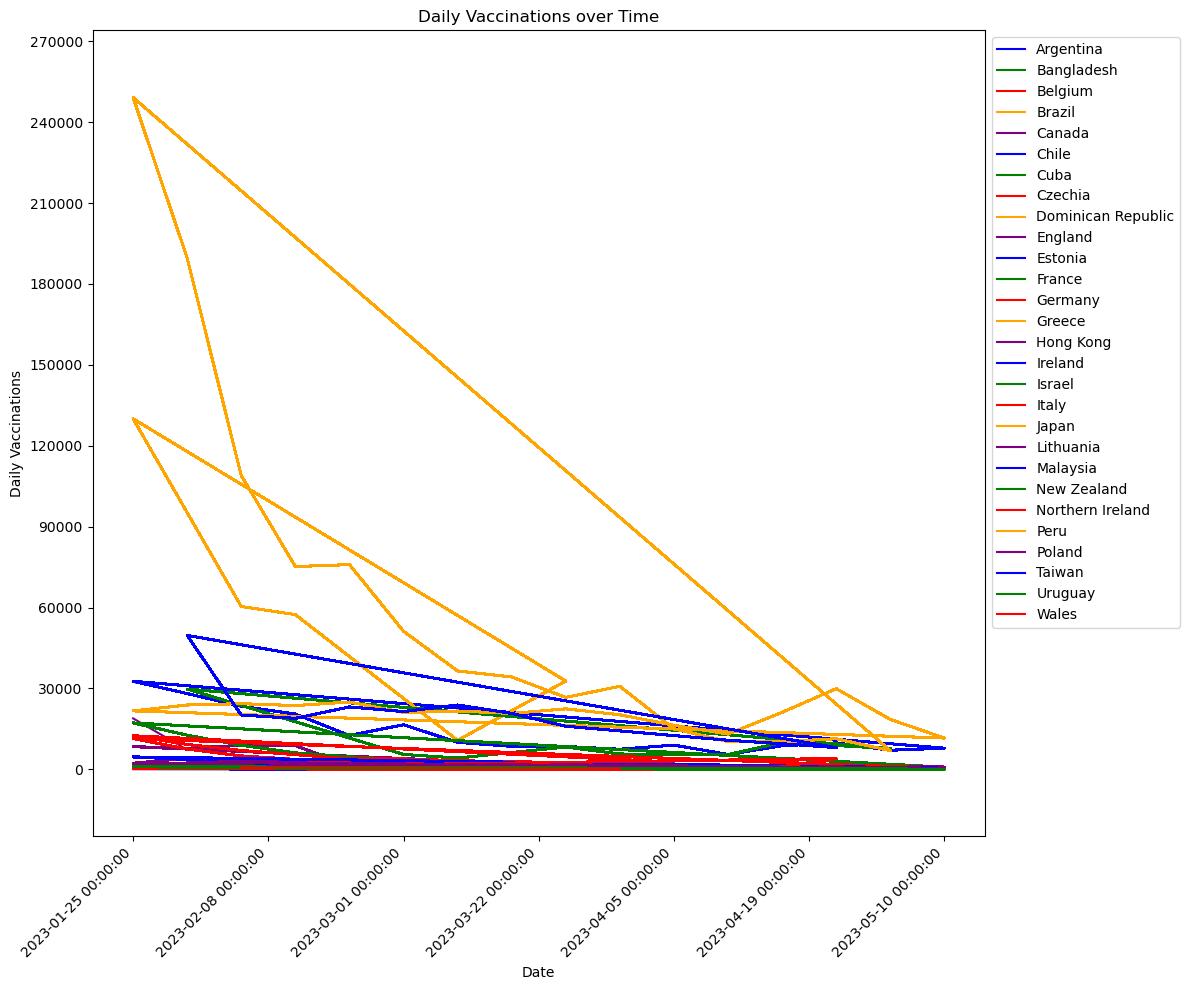

In [64]:
import matplotlib.pyplot as plt
import itertools

# Set the figure size
plt.figure(figsize=(12, 10))

# Create a cycle of colors
colors = itertools.cycle(['blue', 'green', 'red', 'orange', 'purple'])

# Plot the lines with different colors
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    plt.plot(country_data['Date'], country_data['Daily Vaccinations'], color=next(colors), label=country)

# Add legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations')
plt.title('Daily Vaccinations over Time')

# Format date labels as month and year
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8))  # Adjust the number of x-axis ticks

# Increase the number of y-axis ticks
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the number of y-axis ticks

# Set y-axis limits
y_min = merged_df['Daily Vaccinations'].min()  # Minimum value in the data
y_max = merged_df['Daily Vaccinations'].max()  # Maximum value in the data
y_padding = (y_max - y_min) * 0.1  # 10% padding on both ends
plt.ylim(y_min - y_padding, y_max + y_padding)  # Adjust the y-axis limits

# Show the plot
plt.tight_layout()
plt.show()


<p>Based on the graphs above this output seems logical. There would be an initial large volume of vaccines given out due to the fact that the COVID-19 virus was a long pandemic. After some time there would be a slow and gradual decrease in the number of vaccinations daily. This is due to the fact of people who already had received their vaccine not getting another one or herd immunity. What this data shows is that there is some merit behind the scientists belief in herd immunity/vaccinations as less and less are gotten/needed as time wore on</p>